In [1]:
import matplotlib.pyplot as plt

In [11]:
def load_output(filepath):
	with open(filepath, 'r') as f:
		lines = f.readlines()

	preds,labels,sent = [],[],[]
	for i in range(0, len(lines), 7):
		target = lines[i].split('<->')
		labels.append(float(target[0]))
		preds.append(float(target[1]))
		sent.append(target[2])
	# first line is the paragraph
	return preds, labels, sent 


In [12]:
def plotConfusion(preds,labels,title):
    # plot confusion matrix, labels can be classes 0,1,2

	label_map = {"contradiction": 0, 'neutral': 1, "entailment": 2}
	import seaborn as sns
	from sklearn.metrics import confusion_matrix
	import numpy as np
	import pandas as pd

	cm = confusion_matrix(labels, preds)
	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
	df_cm = pd.DataFrame(cm, index = [i for i in label_map.keys()],
					columns = [i for i in label_map.keys()])
	plt.figure(figsize = (10,7))
	plt.title(title)
	sns.heatmap(df_cm, annot=True)
	plt.xlabel('Predicted')
	plt.ylabel('True')
	plt.show()

In [13]:
def printScores(preds,labels):
	from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
	print("Accuracy: ", accuracy_score(labels, preds))
	print("F1: ", f1_score(labels, preds, average='weighted'))
	print("Precision: ", precision_score(labels, preds, average='weighted'))
	print("Recall: ", recall_score(labels, preds, average='weighted'))

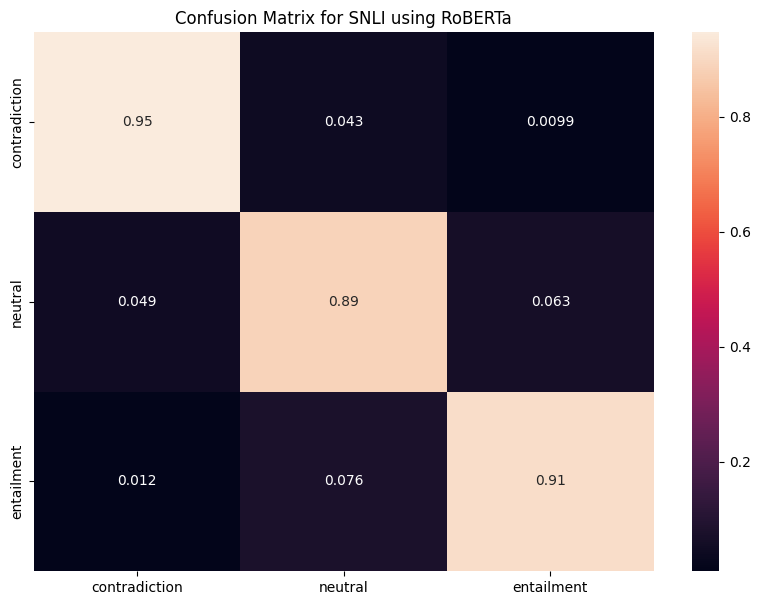

Accuracy:  0.9155130293159609
F1:  0.9155593174853692
Precision:  0.9156992808934957
Recall:  0.9155130293159609


In [5]:
snli_preds,snli_labels,snli_sentences = load_output('output_snli/output.txt')
plotConfusion(snli_preds,snli_labels,"Confusion Matrix for SNLI using RoBERTa")
printScores(snli_preds,snli_labels)

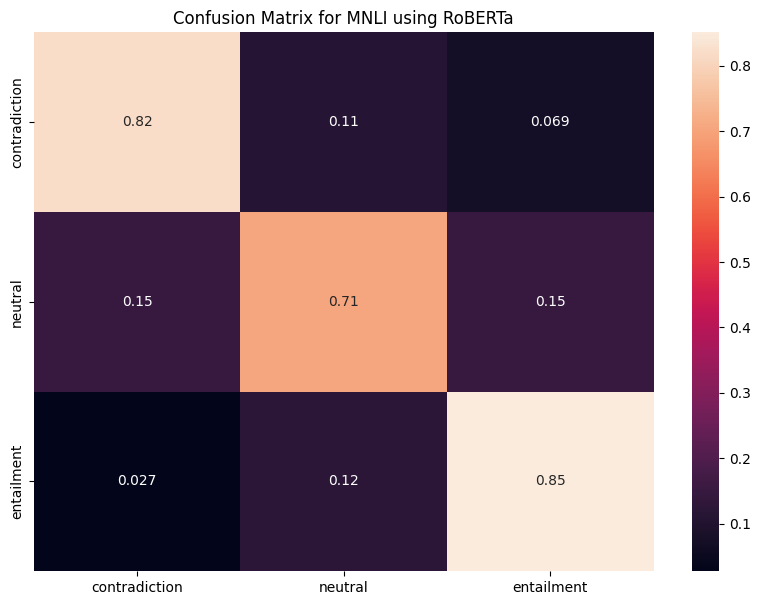

Accuracy:  0.790224032586558
F1:  0.7892445074932327
Precision:  0.7902281719376669
Recall:  0.790224032586558


In [6]:
mnli_preds,mnli_labels,mnli_sentences = load_output('output_mnli/output.txt')
plotConfusion(mnli_preds,mnli_labels,"Confusion Matrix for MNLI using RoBERTa")
printScores(mnli_preds,mnli_labels)

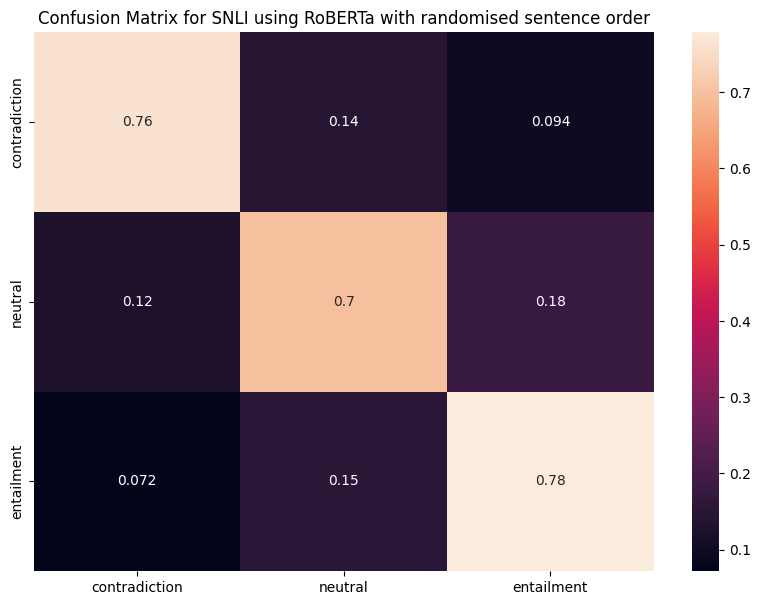

Accuracy:  0.7463355048859935
F1:  0.7464420322647889
Precision:  0.746964313664428
Recall:  0.7463355048859935


In [14]:
snli_preds,snli_labels,snli_sentences = load_output('output_snli_random/output.txt')
plotConfusion(snli_preds,snli_labels,"Confusion Matrix for SNLI using RoBERTa with randomised sentence order")
printScores(snli_preds,snli_labels)

In [12]:
# create mnli test and dev set from train set 
import os 
import json
filepath = './multinli_1.0/'
with open(os.path.join(filepath, 'multinli_1.0_train' + '.jsonl'), 'r', encoding='utf8') as f:
	lines = f.readlines()
# usefull_lines = []
# for line in lines:
# 	line_json = json.loads(line)
# 	gold_label = line_json['gold_label']
# 	sentence1 = line_json['sentence1']
# 	sentence2 = line_json['sentence2']
# 	usefull_lines.append({'gold_label': gold_label, 'sentence1': sentence1, 'sentence2': sentence2})

	

In [5]:
# write to file 

# split into dev and test set and train set
from sklearn.model_selection import train_test_split

train, test = train_test_split(lines, test_size=0.02, random_state=42)
test, dev = train_test_split(test, test_size=0.5, random_state=42)

filepath = './multinli_1.0_all2/'
if os.path.exists(filepath) == False:
	os.mkdir(filepath)
	
with open(os.path.join(filepath, 'multinli_1.0_dev' + '.jsonl'), 'w', encoding='utf8') as f:
	f.writelines(dev)
with open(os.path.join(filepath, 'multinli_1.0_test' + '.jsonl'), 'w', encoding='utf8') as f:
	f.writelines(test)

with open(os.path.join(filepath, 'multinli_1.0_train' + '.jsonl'), 'w', encoding='utf8') as f:
	f.writelines(train)